<h2>Assignment 6 ,Implement SGD for linear regression </h2>

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
X.shape

(506, 13)

<h3> Calculating MSE(Mean Squared Error) with SGDRegressor as model </h3>

In [5]:
myModel = SGDRegressor()
myModel.fit(X, Y)
print(mean_squared_error(Y, myModel.predict(X)))

22.81172918353439


In [6]:
#Coefficeint of SGDRegressor model
myModel.coef_

array([-0.70251193,  0.68014771, -0.35394105,  0.72857554, -1.08472526,
        3.16901961, -0.2820406 , -2.14900677,  0.86741783, -0.64583607,
       -1.7658634 ,  0.95360166, -3.36467247])

In [7]:
data=pd.DataFrame(X)
data['price']=Y
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [8]:
#https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression
# define SGD Classifier
def mySGDFunction(data,learning_rate,n_itr=1000,k=5):
    w_cur=np.zeros(shape=(1,data.shape[1]-1))
    b_cur=0
    cur_itr=1
    while(cur_itr<=n_itr):
        w_old=w_cur
        b_old=b_cur
        w_temp=np.zeros(shape=(1,data.shape[1]-1))
        b_temp=0
        temp=data.sample(k)
        #print(temp.head(3))
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        for i in range(k):
            # -2x/k * (y-(mx +b))
            w_temp+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            # -2/k(y - (mx + b))
            b_temp+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            w_cur=w_old-learning_rate*w_temp
            b_cur=b_old-learning_rate*b_temp
        
        if(w_old==w_cur).all():
            break
        cur_itr+=1
    return w_cur,b_cur

In [9]:
# define predict
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [10]:
# define hyper parameter tuning
def hpyerParamsTuning():
    error=[]
    y1_pred_calc=[]
    r=[0.00001,0.0001,0.001,0.01,0.1]
    for lr in r:
        w,b=mySGDFunction(data,lr,n_itr=1000)
        y1_pred=predict(X,w,b)
        y1_pred_calc.append(y1_pred)
        error.append(mean_squared_error(Y,y1_pred))
    return error,y1_pred_calc;

In [11]:
error,y1_pred_calc=hpyerParamsTuning()
error

[564.6804783288493,
 382.3719466110203,
 32.92304441475184,
 23.15530395614437,
 33.28797041203693]

In [12]:
y1_pred_calc

[array([ 1.03886326e+00,  7.97835681e-01,  1.03792146e+00,  1.10871570e+00,
         1.07319286e+00,  9.55125405e-01,  7.52914893e-01,  6.05943724e-01,
         3.27363919e-01,  6.44273320e-01,  6.23478536e-01,  7.15960962e-01,
         7.33432354e-01,  5.38631910e-01,  4.63103292e-01,  5.24372174e-01,
         6.23088919e-01,  3.76363946e-01,  3.81196983e-01,  4.14713744e-01,
         1.49891493e-01,  3.68420977e-01,  3.05047396e-01,  2.20029287e-01,
         3.18646423e-01,  2.33936704e-01,  3.31951459e-01,  2.82858625e-01,
         4.61972665e-01,  5.08394141e-01,  1.53733604e-01,  3.64975334e-01,
         5.14689618e-02,  2.12921522e-01,  1.69440969e-01,  6.02859407e-01,
         5.63522208e-01,  6.75071206e-01,  6.89780906e-01,  1.24381961e+00,
         1.36208428e+00,  1.10496364e+00,  9.87654311e-01,  9.72424106e-01,
         8.39155301e-01,  7.74260637e-01,  7.23749033e-01,  5.76324806e-01,
         2.59454808e-01,  6.17030755e-01,  8.67702017e-01,  9.21201682e-01,
         1.1

## Since we are getting low error at 0.01 , so plotting the plot also for 0.01

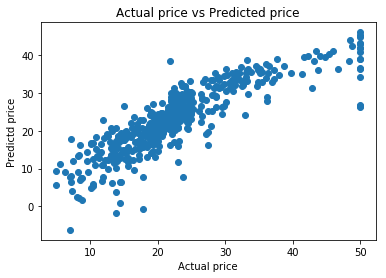

In [13]:
#plot of actual price vs predicted price

plt.scatter(Y,y1_pred_calc[3])
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [14]:
#Comparison between price obtained from own sgd implementation and the given price
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['MSE of SGDRegressor','MSE of implemented SGD']
x.add_row([mean_squared_error(Y, myModel.predict(X)),error[3]])
print(x)

+---------------------+------------------------+
| MSE of SGDRegressor | MSE of implemented SGD |
+---------------------+------------------------+
|  22.81172918353439  |   23.15530395614437    |
+---------------------+------------------------+


<h2>Conclusion:- We Got the lowest Error at learning rate 0.01 to 22.15</h2>